In [1]:
!pip install matplotlib

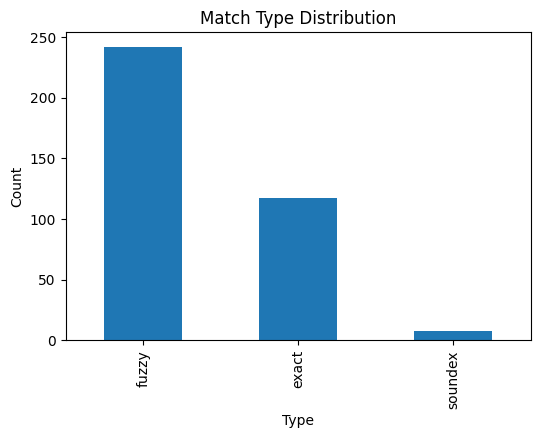

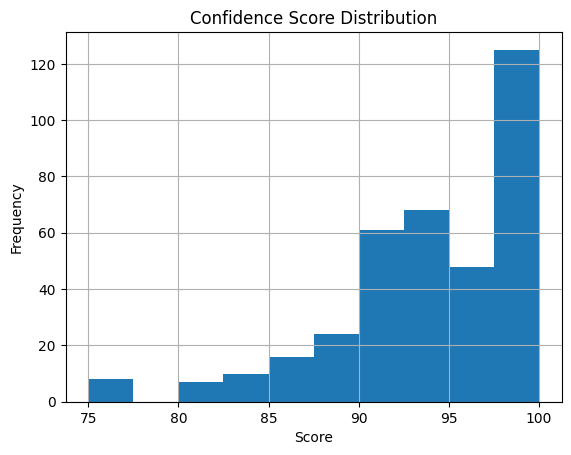

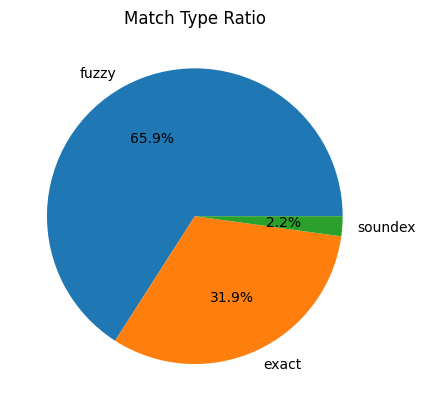

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import getpass

username = getpass.getuser()
engine = create_engine(f"postgresql://{username}@localhost:5432/scout_db")

df = pd.read_sql("SELECT * FROM matched_transactions_final", engine)

# 配对类型统计
type_counts = df["match_type"].value_counts()
type_counts.plot(kind="bar", title="Match Type Distribution", xlabel="Type", ylabel="Count", figsize=(6,4))
plt.show()

# 匹配得分分布
df["confidence_score"].hist(bins=10)
plt.title("Confidence Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# 精确 vs 模糊比例
pie_data = df["match_type"].value_counts()
pie_data.plot(kind='pie', autopct='%1.1f%%', title="Match Type Ratio", ylabel="")
plt.show()


In [4]:
# Scripts/Analysis/count_total_records.py

import pandas as pd
from sqlalchemy import create_engine
import getpass

print("📊 统计参与匹配的总交易记录数...")

username = getpass.getuser()
engine = create_engine(f"postgresql://{username}@localhost:5432/scout_db")

df_tx = pd.read_sql("SELECT COUNT(*) as total FROM transactions_parsed", engine)
total = df_tx["total"].iloc[0]

print(f"✅ 总交易记录数：{total} 条")


📊 统计参与匹配的总交易记录数...
✅ 总交易记录数：321 条
